# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 22 - 5to bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del viernes 14 de noviembre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 33.33% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Importante permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/98W6TBHjyWnwAzTB9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co22.ipynb**
- Los códigos deben poder ejecutarse.
- **IMPORTANTE:** Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el mismo notebook.
- **Prestar mucha atención a cada consigna, responder las preguntas justo debajo del enunciado que corresponda.**
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1** (Temas de la clase 1 y 2)

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = a(z) = \tanh(z) = \tanh(w x + b)
$$

<br>

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

<br>

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

<br>

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores ($n>=200$). Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

<br>

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.

El patrón no lineal puede ser una función trigonométrica, exponencial, logarítmica, sigmoidal o polinómica de grado mayor o igual a 3.

### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()`.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para los 3 learning rates.

<br>

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=-1.308092729753116 ; b=-0.48545799091666897
w_0=0.9253254279710648 ; b_0 = 1.5566041950087555


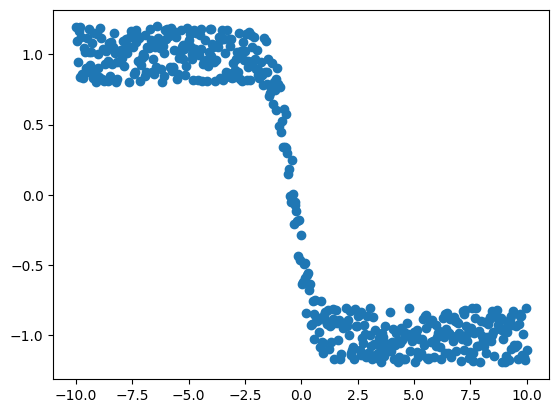

In [396]:
# Definamos primero el dataset
x = np.linspace(-10,10,500)
# x = np.linspace(-3,3,100)
# Hagamos la función no lineal como la tangente hiperbólica
a1, a2 = np.random.uniform(-2,high=2,size=2)
print(f"a={a1} ; b={a2}")
error = np.random.uniform(low=-0.2,high=0.2,size=x.shape[0])
y = np.tanh(a1*x + a2) + error
y_noerror = np.tanh(a1*x + a2)
plt.scatter(x,y)

w_0, b_0 = np.random.uniform(-2,high=2,size=2)
print(f"w_0={w_0} ; b_0 = {b_0}")

Tenemos que la función de pérdida viene dada por: 
$$
J(\theta) = \frac{1}{m} \sum (\hat{y}_i - y)^2
$$
Y la función de predicción es:
$$
\hat{y} = \tanh(w\cdot x + b)
$$
Queremos obtener el gradiente:
$$
\nabla_\theta J(\theta) = \begin{bmatrix}
    \cfrac{\partial J}{\partial w} \\
    \cfrac{\partial J}{\partial b}
\end{bmatrix}
$$
Si hacemos backpropagation tenemos que:
$$
\frac{\partial J}{\partial \theta_i} = \sum_j \frac{\partial J}{\partial \hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_j} \frac{\partial z_j}{\partial \theta_i}
$$
Aclaración: se usa $z$ para denotar $w\cdot x + b$ y hacer más fáciles las derivadas.<br>
Calculemos las derivadas parciales:
$$
\begin{gather*}
\frac{\partial J}{\partial \hat{y}} = \frac{2}{m} (\hat{y} - y) \\
\frac{\partial \hat{y}}{\partial z} = \frac{1}{\cosh^2(z)} \\
\frac{\partial z}{\partial w} = x \\ 
\frac{\partial z}{\partial b} = 1
\end{gather*}
$$
Entonces tenemos:
$$
\begin{gather*}
\frac{\partial J}{\partial w} = \sum_j \frac{2}{m} (\hat{y}_j - y) \cdot \frac{1}{\cosh^2(z_i)} \cdot x \\
\frac{\partial J}{\partial b} = \sum_j \frac{2}{m} (\hat{y}_j - y) \cdot \frac{1}{\cosh^2(z_i)} \cdot 1
\end{gather*}
$$

In [289]:
class GradientDescent():
    def __init__(self, x, y, theta, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.it = 1
        self.loss = 10 # inicio con un valor "alto"
        self.theta = theta
        self.x = x
        self.y = y
        self.y_hat = np.ones(self.x.shape)

    def predict(self):
        self.y_hat = np.tanh(self.theta[0] * self.x + self.theta[1])

    def update_gradient(self):
        z = self.theta[0] * self.x + self.theta[1]

        # dy/dz
        dydz = 1 / (np.cosh(z) ** 2)
        
        # dy_hat / dtheta
        dyhat_dtheta = np.column_stack((
            self.x,
            np.ones(x.shape)
        )) * dydz.reshape(-1,1)

        # dJ_dtheta
        self.gradient = np.mean(2 * (self.y_hat - self.y) * dyhat_dtheta.transpose(), axis=1)

    def update_loss(self):
        self.loss = np.mean((self.y - self.y_hat) ** 2)
    
    def iteration(self):
        # update gradient
        self.update_gradient()

        # update theta
        self.theta = self.theta - self.learning_rate * self.gradient

        # predict y and update loss
        self.predict()
        self.update_loss()

    def optimize(self, epochs=1000):
        self.predict()
        self.update_loss()
        self.loss_path = [self.loss]
        self.theta_path = [[self.theta[0]], [self.theta[1]]]
        while (self.it < epochs+1):
            self.iteration()
            self.loss_path.append(self.loss)
            self.theta_path[0].append(self.theta[0])
            self.theta_path[1].append(self.theta[1])
            self.it += 1
        print(f"Final total loss = {self.loss}")

In [397]:
#gd_optimizer = GradientDescent(x=x, y=y, theta=np.array([w_0,b_0]), learning_rate=0.01)
#gd_optimizer.optimize(epochs=100)
gd_ops = []
for lr in [0.1, 0.01, 0.001]:
    gd_optimizer = GradientDescent(x=x, y=y, theta=np.array([w_0,b_0]), learning_rate=lr)
    gd_optimizer.optimize(epochs=100)
    gd_ops.append(gd_optimizer)

Final total loss = 0.05988129952040644
Final total loss = 0.5586491739156375
Final total loss = 3.5238359106966697


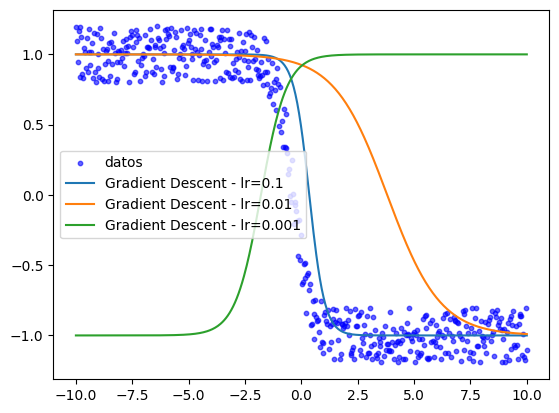

In [398]:
plt.scatter(x,y, label='datos', color='blue', alpha=0.6, s=10)
for gd_optimizer in gd_ops:
    plt.plot(x, gd_optimizer.y_hat, label=f'Gradient Descent - lr={gd_optimizer.learning_rate}')
plt.legend()

### 1b) Implementación de Adam (2 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD.
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch.
- El batch size es a elección de ustedes, pero debe ser mayor o igual a 16.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para ambos modelos y para los 3 learning rates.

<br>

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

#### Respuesta
En [1] se presenta el algorítmo Adam para optimización de funciones. El mismo presenta la siguiente estructura:
Los parámetros se actualizan según: 
$$
\theta_t = \theta_{t-1} - \frac{\alpha\,\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$
donde:
- $\alpha$ es el *stepsize* o *learning rate*.
- $\hat{m}_t$ es el estimador del primer momento corregido por bias
- $\hat{v}_t$ es el estimador del segundo momento corregido por bias
- $\epsilon$ es un valor muy chico para evitar dividir por 0

Los estimadores del primer y segundo momento corregidos por bias se obtienen de:
$$
\begin{gather*}
\hat{m}_t = \frac{m_t}{1-\beta^t_1} \\
m_t = \beta_1\cdot m_{t-1} + (1-\beta_1) \cdot \nabla_\theta f_t(\theta_{t-1}) \\
\hat{v}_t = \frac{m_t}{1-\beta^t_2} \\
v_t = \beta_2\cdot v_{t-1} + (1-\beta_2) \cdot [\nabla_\theta f_t(\theta_{t-1})]^2
\end{gather*}
$$
siendo $m_t$ y $v_t$ los estimadores del primer y segundo momento sin corrección de bias.

Con esto podemos definir las funciones necesarias para implementar el optimizador por Adam.

[1] Adam: A Method for Stochastic Optimization. Diederik Kingma y Jimmy Lei Ba.

In [375]:
class Adam(GradientDescent):
    def __init__(self, x, y, theta, learning_rate=0.001, beta_1=0.9, beta_2=0.999, eps=1E-6, batch_size=0):
        # inicializo lo mismo que para GradientDescent
        super().__init__(x=x, y=y, theta=theta, learning_rate=learning_rate)

        # inicializo las cosas particulares de Adam
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.eps = eps
        self.m = np.zeros(self.theta.shape) # 1st moment biased estimate
        self.v = np.zeros(self.theta.shape) # 2nd moment biased estimate 
        self.m_hat = np.zeros(self.theta.shape) # 1st moment corrected estimate
        self.v_hat = np.zeros(self.theta.shape) # 2nd moment corrected estimate
        self.batch_size = batch_size if batch_size != 0 else self.x.shape[0]
        self.y_hat = np.ones(self.batch_size)
        self.epochs = 0
    
    # se heredan de GradientDescent sin modificaciones:
    #   - update_loss

    def predict(self, x):
        self.y_hat = np.tanh(self.theta[0] * x + self.theta[1])

    def update_gradient(self, x, y):
        z = self.theta[0] * x + self.theta[1]

        # dy/dz
        dydz = 1 / (np.cosh(z) ** 2)
        
        # dy_hat / dtheta
        dyhat_dtheta = np.column_stack((
            x,
            np.ones(x.shape)
        )) * dydz.reshape(-1,1)

        # dJ_dtheta
        self.gradient = np.mean(2 * (self.y_hat - y) * dyhat_dtheta.transpose(), axis=1)

    def update_loss(self, y):
        self.loss = np.mean((y - self.y_hat) ** 2)

    def update_m(self):
        self.m = self.beta_1 * self.m + (1 - self.beta_1) * self.gradient
        self.m_hat = self.m / (1-self.beta_1**self.it)
    
    def update_v(self):
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * self.gradient**2
        self.v_hat = self.v / (1-self.beta_2**self.it)

    def iteration(self, x, y):
        # predict y and update loss
        self.predict(x)
        self.update_loss(y)

        # update gradient
        self.update_gradient(x, y)

        # update moments
        self.update_m()
        self.update_v()

        # update theta
        self.theta = self.theta - self.learning_rate * self.m_hat / (np.sqrt(self.v_hat) + self.eps)
    

    def make_batches(self):
        all_idxs = np.arange(self.x.shape[0])
        self.batches = []
        while all_idxs.shape[0] > 0:
            if self.batch_size < all_idxs.shape[0]:
                idxs = np.random.choice(all_idxs.shape[0], self.batch_size, replace=False) # choose batch_size indexes at random
            else:
                idxs = np.arange(all_idxs.shape[0])
            x = np.array([self.x[all_idxs[i]] for i in idxs])
            y = np.array([self.y[all_idxs[i]] for i in idxs])
            self.batches.append([x,y])
            all_idxs = np.delete(all_idxs, idxs)

    def optimize(self, epochs=1000):
        self.make_batches()

        # predict for all x
        self.predict(self.x)
        # calculate full loss
        self.update_loss(self.y)

        self.loss_path = [self.loss]
        self.theta_path = [[self.theta[0]], [self.theta[1]]]

        while (self.epochs < epochs):
            for batch in self.batches:
                self.iteration(batch[0], batch[1])
                self.it += 1

            if self.batch_size > 1:
                # predict and calculate loss for full-batch
                self.predict(self.x)
                self.update_loss(self.y)
            self.loss_path.append(self.loss)
            self.theta_path[0].append(self.theta[0])
            self.theta_path[1].append(self.theta[1])
            self.epochs += 1

        # predict for all x
        self.predict(self.x)
        # calculate full loss
        self.update_loss(self.y)
        print(f"Final total loss = {self.loss}")

In [399]:
adam_full_batch = []
adam_mini_batch = []

for lr in [0.1, 0.01, 0.001]:
    adam_optimizer_full_batch = Adam(x=x, y=y, theta=np.array([w_0,b_0]), learning_rate=lr)
    adam_optimizer_full_batch.optimize(epochs=100)
    adam_full_batch.append(adam_optimizer_full_batch)

    adam_optimizer_mini_batch = Adam(x=x, y=y, theta=np.array([w_0,b_0]), learning_rate=lr, batch_size=20)
    adam_optimizer_mini_batch.optimize(epochs=100)
    adam_mini_batch.append(adam_optimizer_mini_batch)


Final total loss = 0.017139632066242676
Final total loss = 0.013984816232215128
Final total loss = 1.9840653288112748
Final total loss = 0.013473186633054331
Final total loss = 3.475862643815815
Final total loss = 0.12878980470152146


### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates por separado. Hacerlo con gráficas y tablas.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

#### Respuesta
Veamos en primer lugar a continuación la solución de cada algorítmo para cada learning rate. Además graficamos la que sería la "solución", es decir los datos antes de aplicarles el error que genera la dispersión.<br>
Observamos que para `learning_rate=0.1` obtenemos una solución casi perfecta para Adam mini-batch, mientras que Gradient Descent y Adam full-batch no obtienen bien la solución en la zona no lineal. Si cabe destacar que Adam full-batch está cerca de la solución, seguramente con algunas epochs más se lograría la solución.<br>
Para `learning_rate=0.01` el único que siquiera muestra una forma similar a la solución es Adam mini-batch, además de que nuevamente logra una solución correcta. Para Adam full-batch y gradient descent observamos una forma de solución que no tiene nada que ver con los datos. Esto se debe a que la inicialización de `w` y `b` es pobre (puede pasar dada la aleatoreidad de su selección), y combinado a un `learning_rate` bajo, no logra llevar los valores a algo cercano a la solución dentro del número de epochs permitido.<br>
Por último, para `learning_rate=0.001` Adam mini-batch no lgora representar de manera perfecta la solución, aunque si tiene una forma similar. En cuanto a Adam full-batch y gradient descent ocurre lo mismo que en el caso anterior.

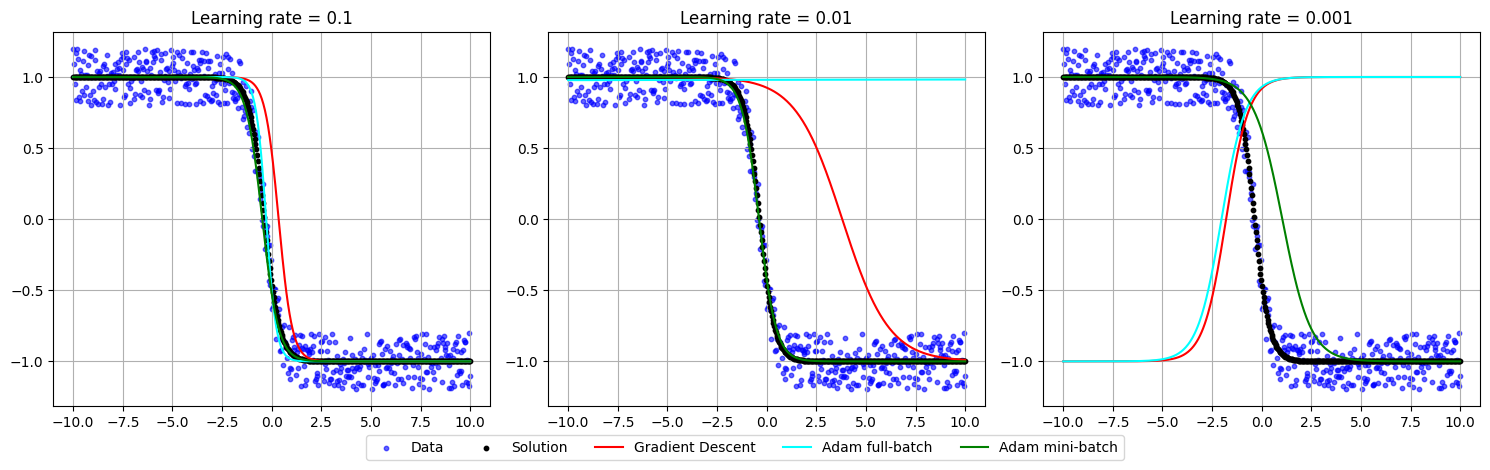

In [400]:
learning_rates = [0.1, 0.01, 0.001]
fig, axs = plt.subplots(1,3, figsize=(15,4.5))
for i in range(3):
    axs[i].scatter(x,y, label='Data', color='blue', alpha=0.6, s=10)
    axs[i].scatter(x, y_noerror, label='Solution', color='black', zorder=2, s=10)
    axs[i].plot(x, gd_ops[i].y_hat, label='Gradient Descent', color='red')
    axs[i].plot(x, adam_full_batch[i].y_hat, label='Adam full-batch', color='cyan')
    axs[i].plot(x, adam_mini_batch[i].y_hat, label='Adam mini-batch', color='green')
    #axs[i].legend()
    axs[i].set_title(f"Learning rate = {learning_rates[i]}")
    axs[i].grid()
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc = 'lower center', ncol=len(labels),
    bbox_to_anchor=(0.5,-0.05)
)
fig.tight_layout()

A continuación tenemos el valor final del error o pérdida para cada algorítmo y para cada `learning_rate`, y también la evolución de la pérdida con los epochs para cada algorítmo y cada `learning_rate`.<br>
En primer lugar observamos que los 2 casos satisfactorios de Adam mini-batch tienen pérdida del orden de 0.01, y que pérdidas ya menores a 0.5 muestran la forma de la solución, pero no se obtiene la solución correcta si no se llega al orden mencionado previamente. Además se ve claramente como los valores de pérdida de los casos insatisfactorios son muy altos.<br>
En cuanto a la evolución de la pérdida observamos como Adam mini-batch con `learning_rate=0.1` obtiene la solución muy rápidamente, en menos de 5 epochs. Luego el mismo algorítmo para `learning_rate=0.01` llega a la solución en alrededor de 30 epochs, con un avance más lento. Y para `learning_rate=0.001` parecería estar empezando a llegar al punto en que la pérdida cae abruptamente en el momento en que se corta el proceso por llegar a la máxima cantidad de epochs permitidos.<br>
Para Adam full-batch en el caso de `learning_rate=0.1` podemos ver como llega a un valor satisfactorio de pérdida de manera suave, mientras que para los otros casos no avanza lo suficientemente rápido hacia la solución.<br>
Gradient descent muestra un avance muy lento aún en el caso de `learning_rate=0.1`, lo cual podría indicar que producto de la inicialización se encontró en un punto con valores de gradiente bajos que no le permiten avanzar. Para los otros casos no avanza practicamente nada de la inicialización.

In [401]:
results = {}
results['learning rate'] = learning_rates
results['gradient descent'] = [opt.loss for opt in gd_ops]
results['adam full batch'] = [opt.loss for opt in adam_full_batch]
results['adam mini batch'] = [opt.loss for opt in adam_mini_batch]
results = pd.DataFrame(results)
results

,learning rate,gradient descent,adam full batch,adam mini batch
0,0.100,0.059881,0.017140,0.013985
1,0.010,0.558649,1.984065,0.013473
2,0.001,3.523836,3.475863,0.128790


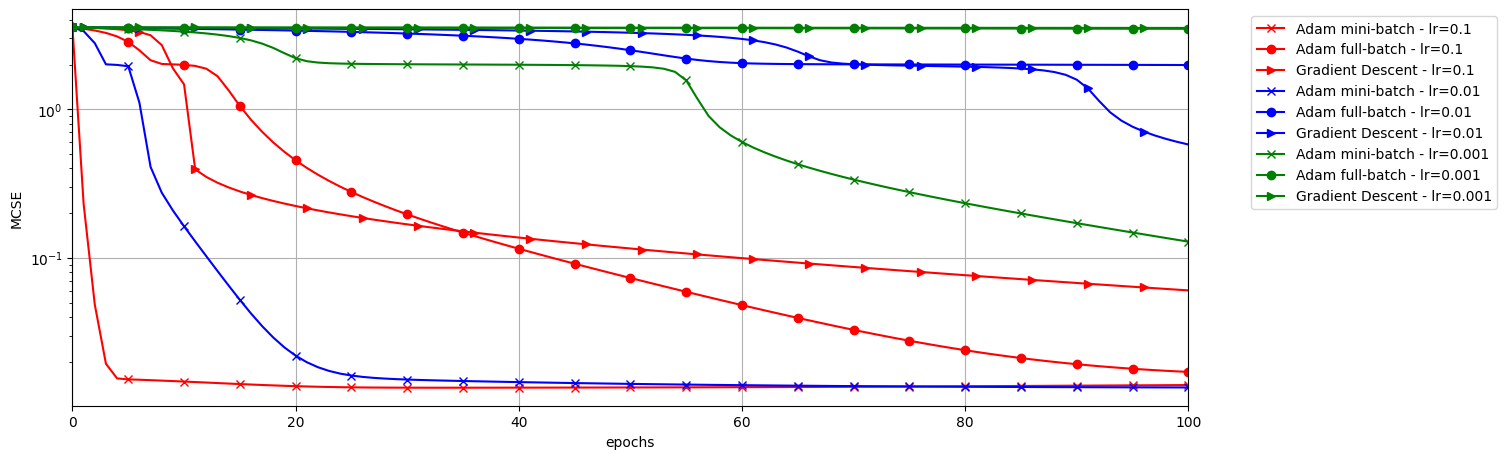

In [402]:
fig, ax = plt.subplots(figsize=(15,4.5))
colors = ['red', 'blue', 'green']
for i in range(3):
    color = colors[i]
    plt.plot(range(0,adam_mini_batch[i].epochs+1),  adam_mini_batch[i].loss_path,   label=f'Adam mini-batch - lr={learning_rates[i]}',   marker='x', markevery=5, color=color)
    plt.plot(range(0,adam_full_batch[i].epochs+1),  adam_full_batch[i].loss_path,   label=f'Adam full-batch - lr={learning_rates[i]}',   marker='o', markevery=5, color=color)
    plt.plot(range(1,gd_ops[i].it+1),               gd_ops[i].loss_path,            label=f'Gradient Descent - lr={learning_rates[i]}',  marker='>', markevery=5, color=color)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim(0,100)
plt.xlabel('epochs')
plt.ylabel('MCSE')
plt.grid()

A continuación podemos ver la evolución de los parámetros `w` y `b`. En líneas a rayas se pueden ver los valores "solución" con los que se generó originalmente la distribución de datos.<br>
Observamos que en el caso de `learning_rate=0.1`, Adam mini-batch logra establecer los valores de los parámetros rápidamente y luego los varia suavemente, mientras que Adam full-batch tiene valores ya cercanos a los correctos pero aún no estables. Además Gradient descent se encuentra lejos del valor correcto en `b` pero cerca en `w`. <br>
Para el caso de `learning_rate=0.01` Adam mini-batch ya tiene los 2 parámetros cerca de la solución, mientras que tanto Adam full-batch como gradient descent se encuentran lejos de la solución.<br>
Por último, para `leraning_rate=0.001`, Adam mini-batch tiene el valor de `w` acercandose a la solución pero aún no en la misma, mientras que el valor de `b` aún está lejos. Esto nos estaría indicando que al hacer backpropagation se obtiene que al principio `w` genera un cambio muy importante en la pérdida, mientras que recién cuando está cerca de la solución importa más optimizar `b`. Esto se puede ver también en el caso anterior de Adam mini-batch. Los otros 2 algorítmos tienen modificaciones leves en los parámetros, aún lejos de la solución.


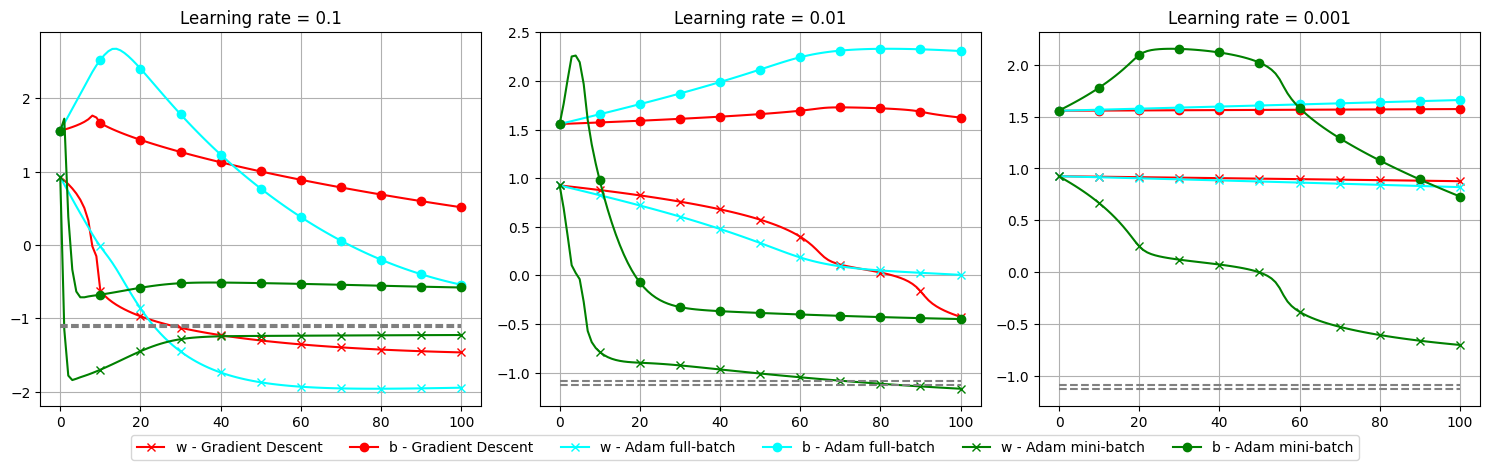

In [408]:
fig, axs = plt.subplots(1,3, figsize=(15,4.5))
for i in range(3):
    axs[i].plot(range(0, gd_ops[i].it), gd_ops[i].theta_path[0], label='w - Gradient Descent', color='red', marker='x', markevery=10)
    axs[i].plot(range(0, gd_ops[i].it), gd_ops[i].theta_path[1], label='b - Gradient Descent', color='red', marker='o', markevery=10)
    axs[i].plot(range(0, adam_full_batch[i].epochs+1), adam_full_batch[i].theta_path[0], label='w - Adam full-batch', color='cyan', marker='x', markevery=10)
    axs[i].plot(range(0, adam_full_batch[i].epochs+1), adam_full_batch[i].theta_path[1], label='b - Adam full-batch', color='cyan', marker='o', markevery=10)
    axs[i].plot(range(0, adam_mini_batch[i].epochs+1), adam_mini_batch[i].theta_path[0], label='w - Adam mini-batch', color='green', marker='x', markevery=10)
    axs[i].plot(range(0, adam_mini_batch[i].epochs+1), adam_mini_batch[i].theta_path[1], label='b - Adam mini-batch', color='green', marker='o', markevery=10)
    #axs[i].legend()
    axs[i].hlines(y=[a,b], xmin=0, xmax=100, colors=['grey', 'grey'], linestyles=['--', '--'])
    axs[i].set_title(f"Learning rate = {learning_rates[i]}")
    axs[i].grid()
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc = 'lower center', ncol=len(labels),
    bbox_to_anchor=(0.5,-0.05)
)
fig.tight_layout()

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

### **RECOMENDACIÓN**:

Les recomiendo revisar el notebook sobre optimizadores que se encuentra en el repo. Pueden acceder mediante el siguiente [enlace](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/blob/ap_2026/CLASE%202/Notebooks/clase2_4_optimizadores.ipynb). En ese notebook vemos cómo aplicar GD y Adam full-batch para una red con relación lineal. Les servirá mucho como guía para realizar esta pregunta.

Además, también tienen disponible el siguiente [material adicional del repo](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/tree/ap_2026/CLASE%202/Teoria/Material%20adicional), el cual le servirá para aplicar Adam, ya no solo en su versión full-batch, sino también en mini-batch

# **PREGUNTA 2** (Temas de la clase 3)

# Caso: Predicción del gasto promedio de los usuarios usando redes neuronales

**Descarga del dataset:**  
El conjunto de datos puede descargarse en el siguiente [enlace](https://drive.google.com/file/d/1e_FRepCpHBWWGj3TYG4HY7WHALCyR4wQ/view?usp=sharing)

---

## Descripción general:

El dataset recopila información sobre las compras realizadas por distintos clientes en una tienda durante el último año.  
Cada registro representa una transacción e incluye datos tanto del cliente como del producto adquirido.

---

## El dataset contiene la siguiente información:

- **User_ID:** Código identificador único del cliente que efectuó la compra.  
- **Product_ID:** Código identificador único del producto adquirido.  
- **Age:** Rango de edad del cliente.  
- **Gender:** Género del cliente (F: Femenino, M: Masculino).  
- **Marital_Status:** Estado civil del cliente (0: Soltero, 1: Casado).  
- **City_Category:** Tipo de zona donde se encuentra la sucursal donde se realizó la compra.  
  - A: Barrio de clase alta  
  - B: Barrio de clase media  
  - C: Barrio de clase media-baja  
- **Stay_In_Current_City_Years:** Número de años que el cliente ha venido comprando en la tienda desde su primera visita.  
- **Product_Category:** Categoría del producto comprado.  
- **Product_Subcategory_1:** Subcategoría principal del producto.  
- **Product_Subcategory_2:** Subcategoría secundaria del producto.  
- **Purchase:** Monto pagado por el producto en esa transacción.

---

## Objetivo del caso de estudio:

Desarrollar un **modelo predictivo** capaz de estimar el **gasto promedio** que realizará un cliente, a partir de su información demográfica y sus patrones de compra.


### 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores.
- Analizar qué columnas sirven para lograr el objetivo y cuáles no (drop) en base al contexto del negocio y a lo entendido del caso de estudio (feature engineering).
- Analizar con qué columnas vale la pena hacer un tratamiento de valores nulos o si simplemente se debe dropear toda la columna porque ya no tiene salvación.
- Analizar a qué variables se les debe hacer label encoding, a cuáles one-hot encoding, ordinal encoding o mapping encoding. Explicar los criterios utilizados para tomar esas decisiones.
- Transformar, agrupar, combinar y operar la data de tal manera que sea útil para extraer patrones de gastos y tendencias de gustos del cliente.



Redactar las conclusiones preliminares que puedan notar de cada feature y justificar el porqué de cada encoding, limpieza o transformación aplicada. Cada justificación se debe redactar a detalle y sustentar con gráficas y/o tablas.


In [ ]:
df = pd.read_csv('dataset_compras.csv')
print(df.shape)
print(df.columns)
print(len(df['User_ID'].unique()))
print(len(df['Product_ID'].unique()))
print(df['Product_Category'].unique())
print(df['Product_Subcategory_1'].unique())
print(df['Product_Subcategory_2'].unique())
print(df['Product_Subcategory_2'].count())
print(len(df['Product_Subcategory_2']) - df['Product_Subcategory_2'].count())
print(df.head(10))

**NOTAS**
- hay que convertir `Age` a una variable categórica pero numérica. El intervalo más chico de edad es 0 y los siguientes van sumando de ahí
- ídem `Gender` y `City_Category`
- V. Categóricas
  - `Age`, `City_Category` y `Stay_In_Current_City_Years` tienen ordinalidad
  - `Gender`, `Marital_Status` y las categorías no

### 2b) Modelo Multilayer Perceptron (MLP) (2.5 puntos)
Entrenar un modelo de deep learning usando PyTorch que consuma el dataframe ya pre-procesado en el paso anterior.

Características para el diseño de la red:
- El modelo debe tener un mínimo de 3 capas ocultas.
- El modelo debe tener un mínimo de 32 neuronas por cada capa oculta.
- Cada capa oculta debe tener su respectiva función de activación.
- La elección de la función de activación de las capas ocultas es libre, pero se debe justificar por qué se está eligiendo esa, ya sea mediante conceptos teóricos o con resultados de pruebas empíricas.
- Analizar y justificar cuál es la mejor función de costo, algoritmo de optimización y learning rate para este modelo.
- Analizar cuál sería el mejor número de épocas para entrenar el modelo.
- Opcional: Incluir técnicas de regularización como dropout en las capas ocultas.

### 2c) Evaluación del Modelo (1 punto)
- Graficar las evoluciones por época de la función de costo y del $R^2$, tanto para el set de train como el de validation.
- Gráfica scatter de Real VS Predicho en el set de validation.
- Explicar el proceso de iteracion utilizado para conseguir los mejores resultados y justificar los resultados obtenidos.
- Un resultado aceptable sería un $R^2$ de al menos 0.55 para el set de validation.

### 2d) Conclusiones finales (0.5 puntos)
Redactar de manera detallada las conclusiones finales y si se cumplió con el objetivo o no.